In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
wine.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<AxesSubplot: xlabel='Ash', ylabel='Label'>

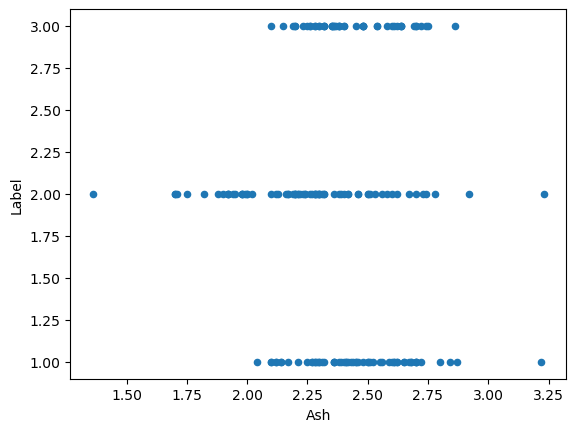

In [222]:
wine.plot.scatter(x = 'Ash', y = 'Label')

<AxesSubplot: xlabel='Malic Acid', ylabel='Label'>

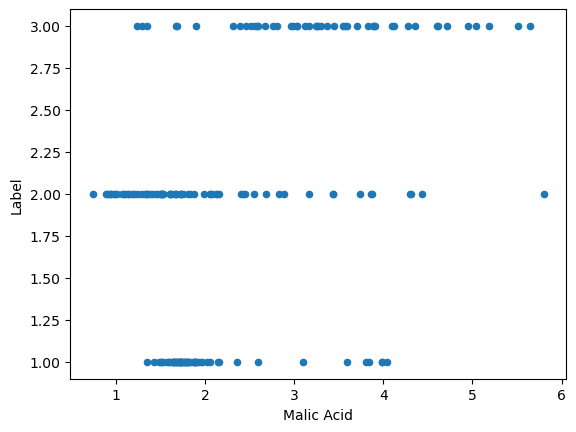

In [223]:
wine.plot.scatter(x = 'Malic Acid', y = 'Label')

<AxesSubplot: xlabel='Ash', ylabel='Label'>

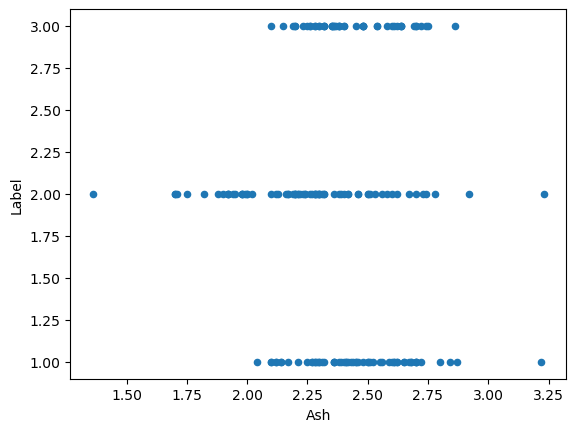

In [224]:
wine.plot.scatter(x = 'Ash', y = 'Label')

<AxesSubplot: xlabel='Alcalinity of ash ', ylabel='Label'>

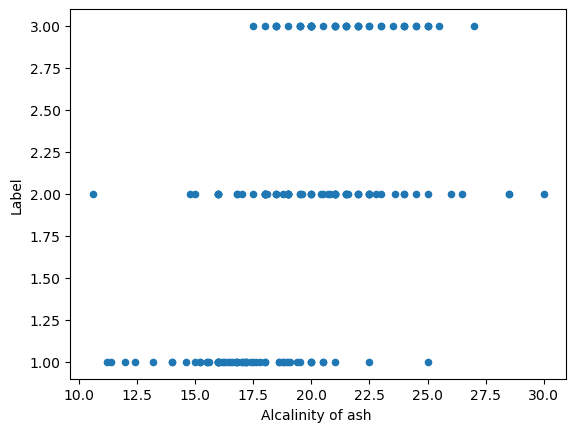

In [225]:
wine.plot.scatter(x = 'Alcalinity of ash ', y = 'Label')

In [226]:
wine.describe()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [227]:
things = wine.values
Y = things[:, 0]
X = things[:, 1:13]

In [228]:
Y = wine.Label
X=wine.drop(columns=['Label'])

In [229]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [230]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
ppn = LogisticRegression(C = 100, max_iter = 1500, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 1.0

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [232]:
from sklearn.tree import DecisionTreeClassifier
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9166666666666666

Confusion matrix: 
[[13  1  0]
 [ 1 12  0]
 [ 0  1  8]]

Classification report: 
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.86      0.92      0.89        13
           3       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [233]:
from sklearn.svm import SVC
ppn = SVC(C= 10000, kernel = 'rbf', degree = 3)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9722222222222222

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.96        13
           3       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [234]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [235]:
print('Count of unique values in each column:')
print(wine.nunique())

Count of unique values in each column:
Label                             3
Alcohol                         126
Malic Acid                      133
Ash                              79
Alcalinity of ash                63
Magnesium                        53
Total phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64


In [236]:
Y = wine.Label
X=wine.drop(columns=['Label'])
num_cols = X.columns[X.nunique()>7]
cat_cols = X.columns[X.nunique()<=7]

In [237]:
print("Columns with missing values are:")
print(X.columns[X.isnull().sum()>0])

Columns with missing values are:
Index([], dtype='object')


In [238]:
cat_vals = Pipeline([("imputer",SimpleImputer(strategy='most_frequent')), ("ohe",OneHotEncoder(sparse=False, drop='first', handle_unknown = 'ignore'))])

In [239]:
num_vals = Pipeline([("imputer",SimpleImputer(strategy='mean')),("scale",StandardScaler())])

In [240]:
preprocess = ColumnTransformer( transformers=[ ("cat_process", cat_vals, cat_cols), ("num_process", num_vals, num_cols) ] )

In [241]:
pipeline = Pipeline([("preprocess",preprocess), ("pca", PCA()), ("clf",LogisticRegression())])

In [245]:
pipeline.fit(X_train, Y_train)
print("Pipeline Accuracy Test:", pipeline.score(X._test, Y_test))

IndexError: tuple index out of range

In [246]:
search_space = [
    {'clf': [LogisticRegression()],
     'clf__C': np.logspace(-4, 2, 10),
     'pca__n_components': np.linspace(30, 37, 3).astype(int)},
]

In [247]:
gs = GridSearchCV(pipeline, search_space, cv=5)
gs.fit(X_train, Y_train)

ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/utils/__init__.py", line 424, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/sklearn/compose/_column_transformer.py", line 724, in fit_transform
    self._validate_column_callables(X)
  File "/usr/lib/python3/dist-packages/sklearn/compose/_column_transformer.py", line 426, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3/dist-packages/sklearn/utils/__init__.py", line 426, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for pandas DataFrames


In [248]:
best_model = gs.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [219]:
print('The best classification model is:')
print(best_model.named_steps['clf'])
print('The hyperparameters of the best classification model are:')
print(best_model.named_steps['clf'].get_params())
print('The number of components selected in the PCA step are:')
print(best_model.named_steps['pca'].n_components)

The best classification model is:


NameError: name 'best_model' is not defined

In [220]:
print("Final accuracy score:")
print(best_model.score(X_test,y_test))

Final accuracy score:


NameError: name 'best_model' is not defined